# ITNPBD2 Representing and Manipulating Data

# Data Visualisation with Matplotlib, Seaborn and Plotly

# Matplotlib - Plotting NumPy Arrays
## https://matplotlib.org/

# Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Plot a Series
- `plot` assumes X axis runs from 0 in integer increment

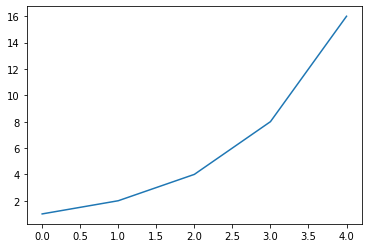

In [2]:
plt.plot([1,2,4,8,16])
plt.show()

# Create X,Y Data and Plot
Generally, you will want to specify the X axis data too
- X = numbers in range -4 to 4
- Y = X squared
- Simple plot with no decoration

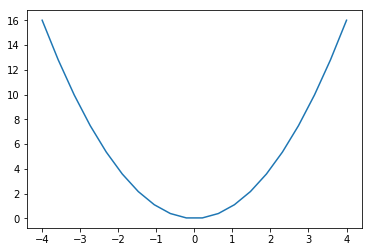

In [3]:
x = np.linspace(-4,4,20)
y = x*x

plt.plot(x,y)
plt.show()

# Label Axes

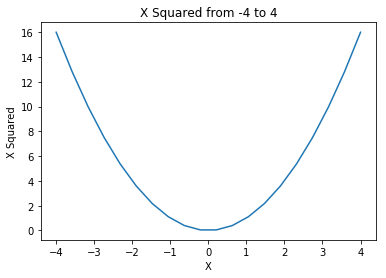

In [4]:
plt.plot(x, y)
plt.xlabel("X")
plt.ylabel("X Squared")
plt.title('X Squared from -4 to 4')
plt.show()

# Add More Lines and a Legend
- Specify colour of each line
- Specify a label for each series
- Add a legend

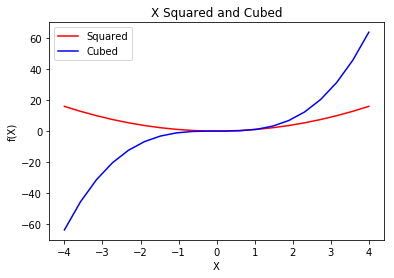

In [5]:
plt.plot(x, y, 'r', label='Squared')
plt.plot(x, x*x*x, 'b', label="Cubed")
plt.xlabel("X")
plt.ylabel("f(X)")
plt.legend()
plt.title("X Squared and Cubed")
plt.show()

# Plot as a Scatter, not a line

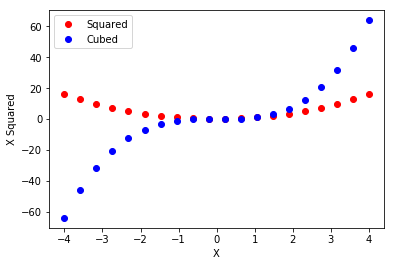

In [6]:
plt.plot(x, y, 'ro', label='Squared')
plt.plot(x, x*x*x, 'bo', label="Cubed")
plt.xlabel("X")
plt.ylabel("X Squared")
plt.legend()

plt.show()

# A Closer look at the arguments
- The first two (or one) are the X and Y data
- The next is the format, which uses a short hand string format `[color][marker][line]` (where `[]` indicates it is optional)
- Each element is one or two characters - order is not too important
- See https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot for a full list

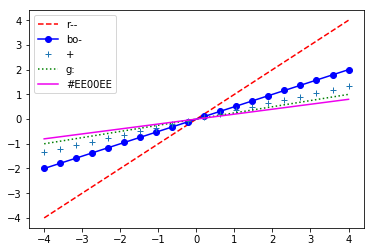

In [7]:
yset = [x/i for i in range(1,6)]
fmt = ['r--', 'bo-', '+', 'g:', '#EE00EE']
for i in range(0,5):
    plt.plot(x,yset[i],fmt[i],label=fmt[i])
plt.legend()
plt.show()

# Other Chart Types
 - Scatter (bubble)
 - Bar (vertical and horizontal)
 - Histogram

# Another way to Draw Scatter graphs:
 - Add a third series for point sizes
- Sometimes called bubble charts
- Size of each point is the square root of the given value!

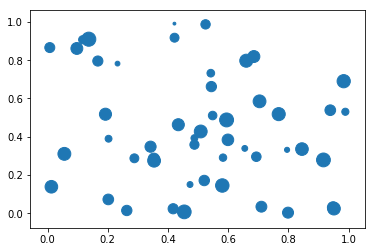

In [8]:
x = np.random.random(50)
y = np.random.random(50)
sz = np.random.randint(2,200,50)
plt.scatter(x, y, s=sz)
plt.show()


# Add a fourth dimension: Colour
- You can specify an array of colour values,
- Or provide an array of floats to be mapped to colours by some colour map

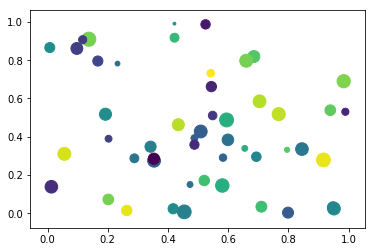

In [9]:
cl = np.random.random(50)
plt.scatter(x, y, s=sz, c=cl)
plt.show()

# Let's Play with Colour Maps
- Fill the space with random point - note the size is a single value now, not an array, so all are same size
- Change the colour along the X axis to see the colour map
- Here is the default

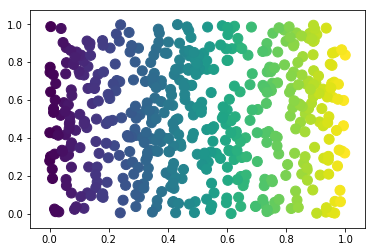

In [10]:
x = np.random.random(500)
y = np.random.random(500)
plt.scatter(x, y, s=100, c=x)

plt.show()

# Choose a Colour Map
- Use `cm.(colormap name)` or `cm['colormap name]`
- See https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html for a list
- Four Examples:

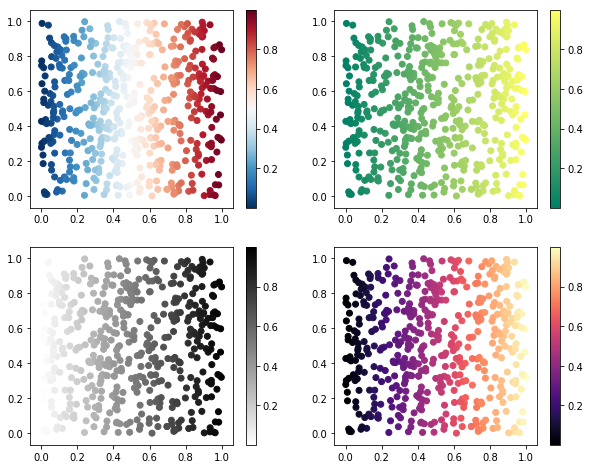

In [11]:
# Array of colour map names
cmaps = [plt.cm.RdBu_r,plt.cm.binary,plt.cm.summer,plt.cm.magma]

# Begin a figure - allows multiple plots on same figure. Also allows size to be set
fig, axs = plt.subplots(2,2,figsize=(10,8))
i = 0
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        sc = ax.scatter(x, y, c=x, cmap=cmaps[i])
        i+=1
        fig.colorbar(sc, ax=ax)
plt.show()

# Make the Bubbles Transparent
- If some bubble are big, they can shade others, so make them all semi-transparent with an alpha value

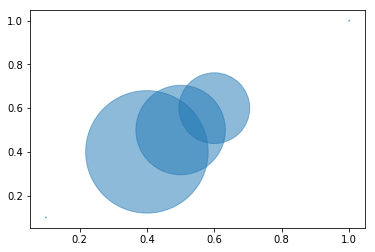

In [12]:
x = [.1,.4,.5,.6,1]
y = [.1,.4,.5,.6,1]
sz = [1,15000,8000,5000,1]
plt.scatter(x, y, s=sz, alpha=0.5)
plt.show()

# Bar Charts
- Usually for aggregated values like totals or averages
- Bar charts have spaces between the bars
- Horizontal to show labels nicely - `barh`

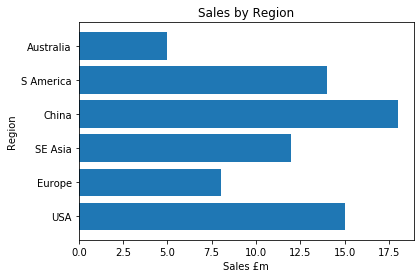

In [4]:
region = ['USA','Europe','SE Asia','China','S America','Australia']
sales = [15,8,12,18,14,5]
plt.barh(region,sales)
plt.ylabel('Region')
plt.xlabel('Sales £m')
plt.title('Sales by Region')
plt.show()

## Vertical Bars for a sequence

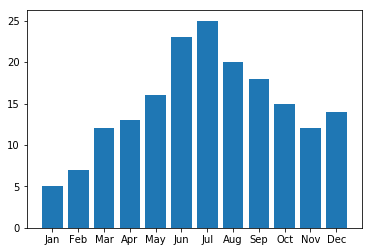

In [14]:
import calendar
# Make array of the first three letters of each month from the calendar module
months = [calendar.month_name[i][:3] for i in range(1,13)]
sales = [5,7,12,13,16,23,25,20,18,15,12,14]
plt.bar(months,sales)
plt.show()

# Grouped Bar Charts
- Plot several grouped series by moving the X axis for each one

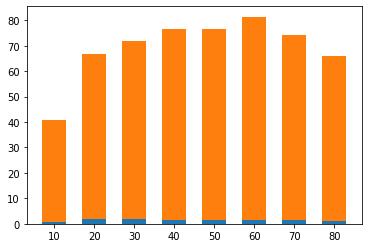

In [6]:
ages = np.array([10,20,30,40,50,60,70,80])
heights = [0.8,1.7,1.7,1.6,1.6,1.4,1.3,1]
weights = [40,65,70,75,75,80,73,65]

plt.bar(ages,heights,6)
plt.bar(ages,weights,6, bottom=heights)
plt.show()

# Histograms for frequency distributions
- Continuous X axis
- No space between bars
- `hist` function takes the **raw data** and creates a histogram with a given number of bins - you do not have to calculate the frequencies yourself

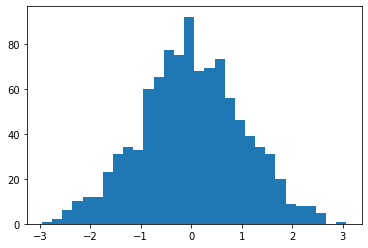

In [8]:
# 1000 random numbers with mean 0, variance 1 and a normal distribution
data = np.random.randn(1000)
plt.hist(data, 30)
plt.show()

# Plotting from Pandas with Seaborn
## https://seaborn.pydata.org/
- We mostly used NumPy with Matplotlib (though we didn't have to)
- Now we will mostly use Pandas with Seaborn - that is what it is designed for
- Seaborn has nice visualisations - it is built on top of matplotlib
- It also has some statistical modelling capabilities to visualise underlying relationships or distributions in data
## Make sure you have version 0.9 

In [9]:
import seaborn as sns
import pandas as pd

# Seaborn comes with some example data sets ready loaded

In [10]:
tips = sns.load_dataset("tips")
display(tips.head())
tips.describe()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Scatter plot of tips against total bill size

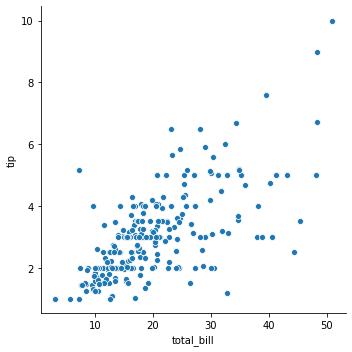

In [11]:
sns.relplot(x='total_bill', y='tip', data=tips)

# Let's add colour for day of the week

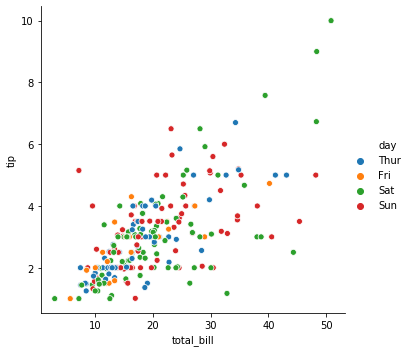

In [12]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='day')


# Change the size of the points with table size

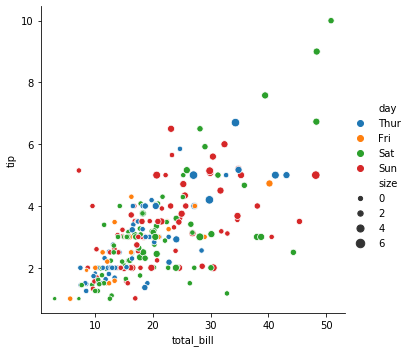

In [13]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='day', size='size')


# We can control the size difference with `sizes` argument

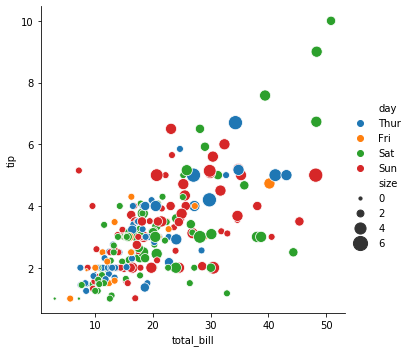

In [14]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='day', size='size', sizes=(10,200))


# Scatter Plotting Category Values
- If the X axis is a category, the order of the axis is meaningless, and the points may all coincide
- Plot the data with a `catplot`

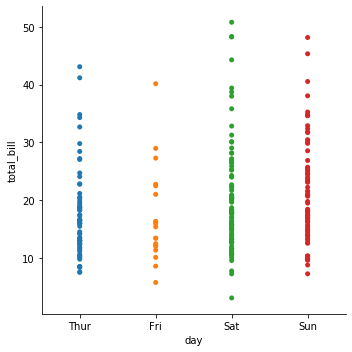

In [15]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

# This might be what you want, but perhaps you want to spread out the X axis for more clarity

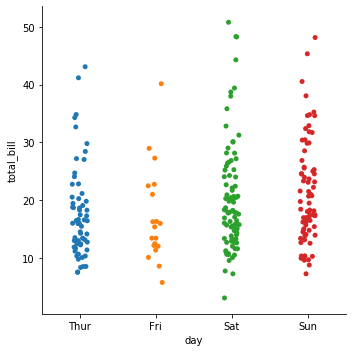

In [16]:
sns.catplot(x="day", y="total_bill", data=tips)

# A beeswarm plot reflects the distribution at the X axis better
Use `kind='swarm'

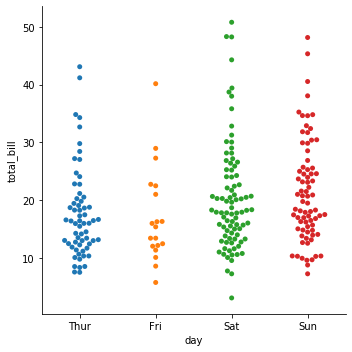

In [17]:
sns.catplot(x="day", y="total_bill", kind='swarm', data=tips)

# Seaborn will also do statistical estimation for you.
- Here is a violin plot, made using kernal density estimation

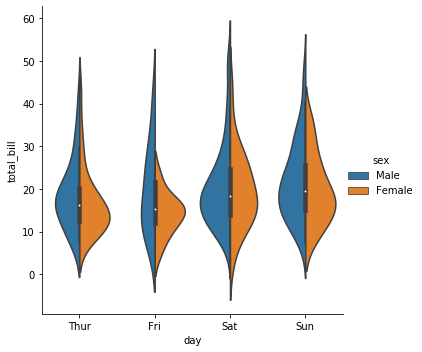

In [18]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips)

# Here we plot a scatter plot but add an estimation of the regression line and a 95% confidence interval for that regression
We do this using `lmplot`

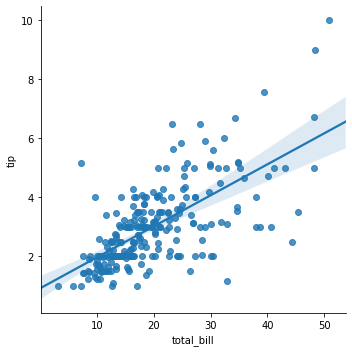

In [19]:
sns.lmplot(x="total_bill", y="tip", data=tips)

# We can explore distributions with Seaborn
- Here we plot a histogram and a rug plot

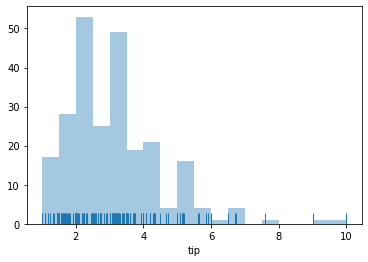

In [20]:
sns.distplot(tips['tip'], kde=False, rug=True)

# Now we add a kernel density estimator

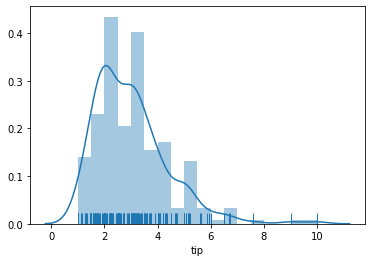

In [21]:
sns.distplot(tips['tip'], kde=True, rug=True)

# Plotly for Interactive and Animated Plots
## You can use Plotly online or offline
## https://plot.ly/
- Online means Plotly will host the graph for you and you access it via a URL. You need a plotly account to do this
- Offline is more like the other examples we have seen - everything runs on the local computer.
- How these are managed was changed in version 4. We will use the offline version 4.
- Plotly Express is a quick way of producing Plotly charts, so let's start with that

In [30]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
import plotly.express as px
fig = px.scatter(tips, x="total_bill", y="tip")
fig.show()


ImportError: No module named 'plotly.express'

# 3D Plots work much better if you can rotate them
## Plotly can do that
- E.g `scatter_3d'

In [ ]:
fig = px.scatter_3d(tips, x="total_bill", y="tip", z="size", color="sex")
fig.show()

# One more example - Contour map for bivariate distribution visualisation

In [ ]:
fig = px.density_contour(tips, x="total_bill", y="tip")
fig.show()

# Save and share Plotly charts in JSON
- You can define everything about a plotly chart in JSON
- Helps you share and store charts
- Use the `plotly.io` module

In [ ]:
fig = {
    "data": [{"type": "bar",
              "x": ['A', 'B', 'C'],
              "y": [1, 2, 3]}],
    "layout": {"title": {"text": "A Bar Chart"}}
}

import plotly.io as pio
pio.show(fig)


# The chart objects we have been using plotly `show` to display contain JSON!

In [ ]:
fig = px.density_contour(tips, x="total_bill", y="tip")
print(type(fig))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41af8bd7-a5ed-4334-a2fe-992dcc7ea742' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>